<a href="https://colab.research.google.com/github/Vishnu-vardhan29/Deep-learning/blob/main/EXP9%2C10%2C11%2C14_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam',
metrics=['accuracy'])
# Train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10,
batch_size=200, verbose=2)
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc*100:.2f}%')




11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
300/300 - 46s - loss: 0.3497 - accuracy: 0.8935 - val_loss: 0.0658 - val_accuracy: 0.9785 - 46s/epoch - 152ms/step
Epoch 2/10
300/300 - 46s - loss: 0.1005 - accuracy: 0.9704 - val_loss: 0.0443 - val_accuracy: 0.9854 - 46s/epoch - 152ms/step
Epoch 3/10
300/300 - 44s - loss: 0.0722 - accuracy: 0.9778 - val_loss: 0.0407 - val_accuracy: 0.9867 - 44s/epoch - 146ms/step
Epoch 4/10
300/300 - 50s - loss: 0.0592 - accuracy: 0.9823 - val_loss: 0.0298 - val_accuracy: 0.9900 - 50s/epoch - 168ms/step
Epoch 5/10
300/300 - 48s - loss: 0.0528 - accuracy: 0.9843 - val_loss: 0.0260 - val_accuracy: 0.9907 - 48s/epoch - 160ms/step
Epoch 6/10
300/300 - 44s - loss: 0.0449 - accuracy: 0.9865 - val_loss: 0.0283 - val_accuracy: 0.9894 - 44s/epoch - 145ms/step
Epoch 7/10
300/300 - 43s - loss: 0.0399 - accuracy: 0.9877 - val_loss: 0.0270 - val_accuracy: 0.9907 - 43s/epoch - 145ms/step
Epoch 8/10
300/300 - 46s - loss: 0.0341 - accuracy: 0

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample data: sentences and their corresponding labels
sentences = [ "I love this product", "This is terrible", "Great job!", "Not good at all", "Awesome stuff" ]
labels = [1, 0, 1, 0, 1]

# Tokenize the text data:
tokenizer = Tokenizer(num_words=1000, oov_token="")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

# Convert sentences to sequences of integers
sequences = tokenizer.texts_to_sequences(sentences)

# Pad sequences to have the same length
max_sequence_length = max([len(seq) for seq in sequences])
sequences_padded = pad_sequences(sequences, maxlen=max_sequence_length, padding="post")

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=64, input_length=max_sequence_length))
model.add(LSTM(64))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Test sentences for predictions
test_sentences = [
    "This is amazing",
    "Absolutely awful",
    "Well done!",
    "Very disappointing"
]

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_sequences_padded = pad_sequences(test_sequences, maxlen=max_sequence_length, padding="post")

# Make predictions
predictions = model.predict(test_sequences_padded)

# Print the predictions
for i, sentence in enumerate(test_sentences):
    sentiment = "Positive" if predictions[i] > 0.5 else "Negative"
    print(f"Sentence: '{sentence}' - Sentiment: {sentiment} ({predictions[i][0]:.2f})")


1/1 [==============================] - 0s 444ms/step
Sentence: 'This is amazing' - Sentiment: Positive (0.50)
Sentence: 'Absolutely awful' - Sentiment: Negative (0.50)
Sentence: 'Well done!' - Sentiment: Negative (0.50)
Sentence: 'Very disappointing' - Sentiment: Negative (0.50)


2/2 [==============================] - 0s 8ms/step
Epoch 1000/1000 - D Loss: 4.655606150627136 - G Loss: 0.0001814712304621935
1/1 [==============================] - 0s 24ms/step


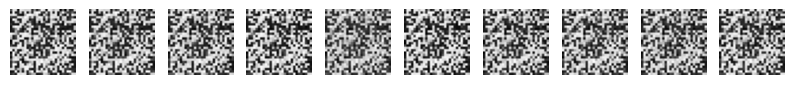

In [7]:


import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
# Define the generator model
def build_generator(latent_dim):
 model = Sequential()
 model.add(Dense(128, input_dim=latent_dim, activation='relu'))
 model.add(Dense(784, activation='sigmoid'))
 model.add(Reshape((28, 28, 1)))
 return model
# Define the discriminator model
def build_discriminator(input_shape):
 model = Sequential()
 model.add(Flatten(input_shape=input_shape))
 model.add(Dense(128, activation='relu'))
 model.add(Dense(1, activation='sigmoid'))
 return model
# Define the GAN model that combines the generator and discriminator
def build_gan(generator, discriminator):
 discriminator.trainable = False
 model = Sequential()
 model.add(generator)
 model.add(discriminator)
 return model
# Load and preprocess the dataset (e.g., MNIST)
from tensorflow.keras.datasets import mnist
(X_train, _), (_, _) = mnist.load_data()
X_train = X_train / 255.0 # Normalize pixel values to the range [0, 1]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
# Set hyperparameters
latent_dim = 100
epochs = 1000
batch_size = 64
# Build and compile the generator, discriminator, and GAN models
generator = build_generator(latent_dim)
discriminator = build_discriminator(X_train[0].shape)
gan = build_gan(generator, discriminator)
discriminator.compile(loss='binary_crossentropy',
optimizer=Adam(lr=0.0002, beta_1=0.5))
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002,
beta_1=0.5))
# Training loop
for epoch in range(epochs):
 # Train discriminator
 idx = np.random.randint(0, X_train.shape[0], batch_size)
 real_images = X_train[idx]
 labels_real = np.ones((batch_size, 1))
 labels_fake = np.zeros((batch_size, 1))
 noise = np.random.normal(0, 1, (batch_size, latent_dim))
 generated_images = generator.predict(noise)
 d_loss_real = discriminator.train_on_batch(real_images, labels_real)
 d_loss_fake = discriminator.train_on_batch(generated_images,
labels_fake)
 d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
 # Train generator
 noise = np.random.normal(0, 1, (batch_size, latent_dim))
 labels_gan = np.ones((batch_size, 1))
 g_loss = gan.train_on_batch(noise, labels_gan)
 # Print progress
if (epoch + 1) % 1000 == 0:
 print(f"Epoch {epoch + 1}/{epochs} - D Loss: {d_loss} - G Loss: {g_loss}")

 # Save generated images at specified intervals
 if (epoch + 1) % 1000 == 0:
  num_samples = 10
 noise = np.random.normal(0, 1, (num_samples, latent_dim))
 generated_images = generator.predict(noise)
 plt.figure(figsize=(10, 2))
 for i in range(num_samples):
  plt.subplot(1, num_samples, i + 1)
 plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
 plt.axis('off')
 plt.savefig(f"gan_generated_image_epoch_{epoch + 1}.png")
 plt.close()
# Generate and save final images
num_samples = 10
noise = np.random.normal(0, 1, (num_samples, latent_dim))
generated_images = generator.predict(noise)
plt.figure(figsize=(10, 2))
for i in range(num_samples):
 plt.subplot(1, num_samples, i + 1)
 plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
 plt.axis('off')
plt.savefig("final_generated_images.png")
plt.show()

In [8]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
max_features = 20000 # Only consider the top 20k words
maxlen = 200 # Only consider the first 200 words of each movie review
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(
num_words=max_features
)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train,
maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val,
maxlen=maxlen)
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=2,
validation_data=(x_val, y_val))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 128)         2560000   
                                                                 
 bidirectional (Bidirection  (None, None, 128)         98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2757761 (10.52 MB)
Trainable params: 2757761 (1